In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import IncrementalPCA

In [26]:
X = np.load('X.npy')
y = np.load('y.npy')

In [27]:
print X.shape

(251, 20736)


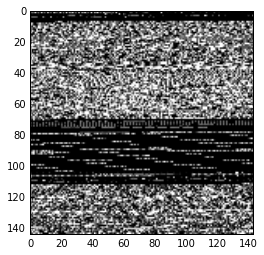

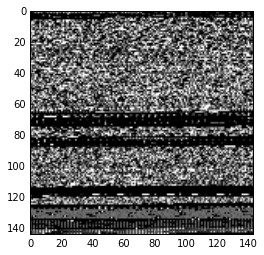

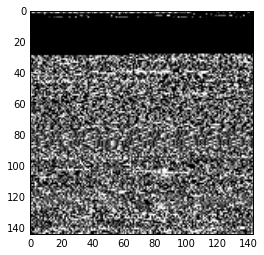

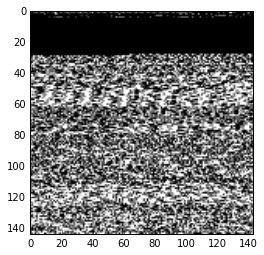

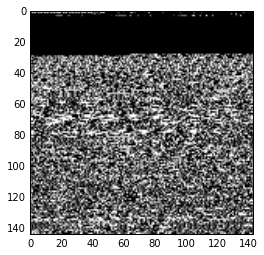

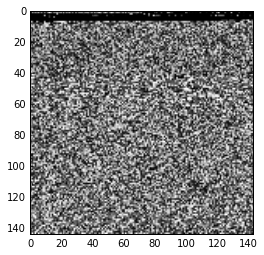

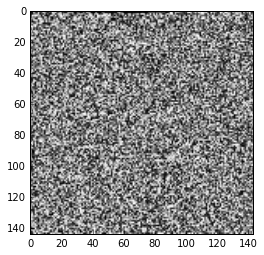

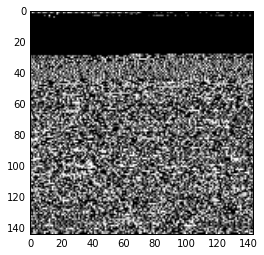

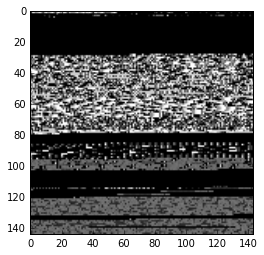

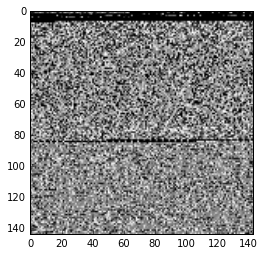

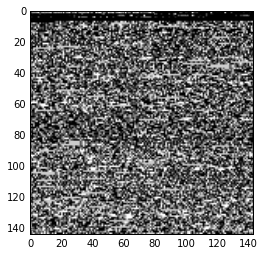

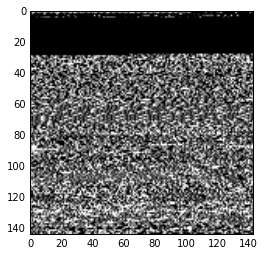

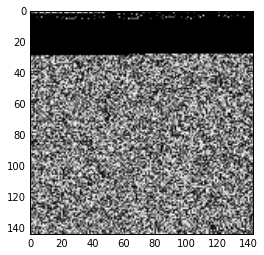

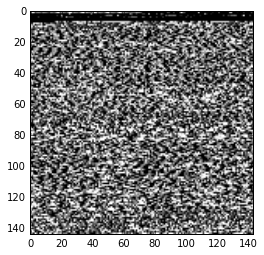

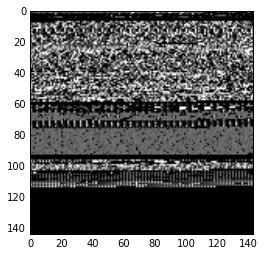

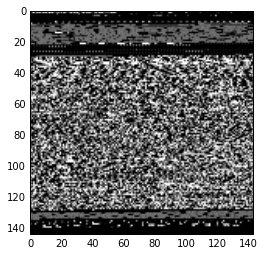

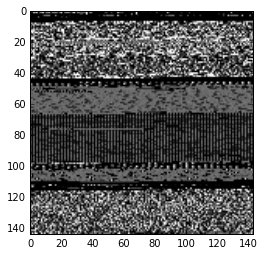

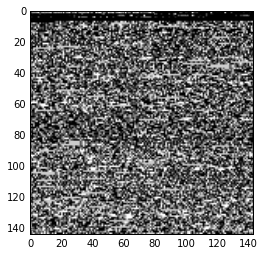

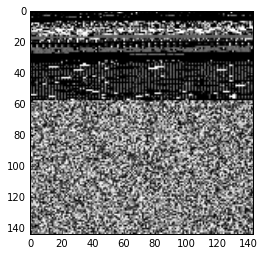

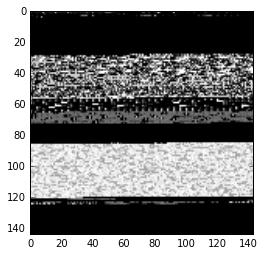

In [4]:
for i in range(20):
    plt.figure()
#     print y[i]
    plt.imshow(X[i].reshape(144,144), cmap="gray")

In [28]:
X = np.uint8(X)

In [29]:
brighter_X = X*1.5
brighter_y = y
darker_X = X/5
darker_y = y

In [30]:
X = np.concatenate((X,brighter_X,darker_X), axis=0)
y = np.concatenate((y,brighter_y,darker_y), axis=0)

1
0
0


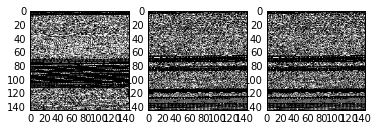

In [8]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(X[0].reshape(144,144), cmap="gray")
print y[0]
plt.subplot(1,3,2)
plt.imshow(X[252].reshape(144,144), cmap="gray")
print y[252]
plt.subplot(1,3,3)
plt.imshow(X[503].reshape(144,144), cmap="gray")
print y[503]

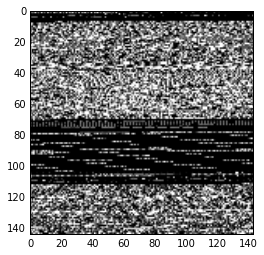

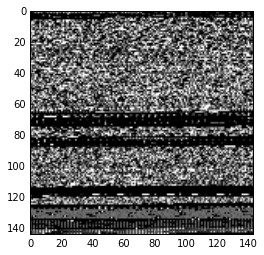

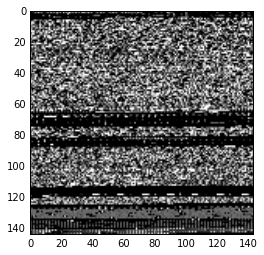

In [9]:
plt.figure()
plt.imshow(X[0].reshape(144,144), cmap="gray")
plt.figure()
plt.imshow(X[252].reshape(144,144), cmap="gray")
plt.figure()
plt.imshow(X[503].reshape(144,144), cmap="gray")

In [31]:
print X.shape

(753, 20736)


In [32]:
indices = np.random.choice(y.shape[0],y.shape[0])
X = X[indices]
y = y[indices]

In [33]:
np.save('X_aug',X)
np.save('y_aug',y)

In [11]:
# temp = np.fliplr(X)
# plt.figure()
# plt.imshow(X[51].reshape(144,144), cmap="gray")
# plt.figure()
# plt.imshow(np.flipud(temp[51]).reshape(144,144), cmap="gray")

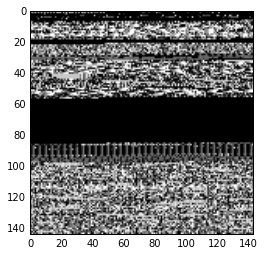

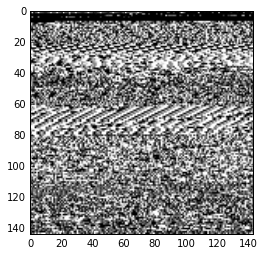

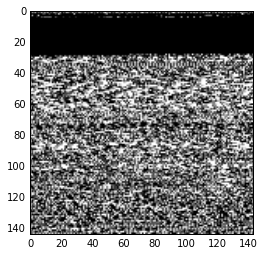

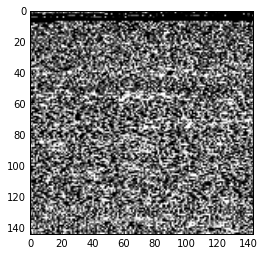

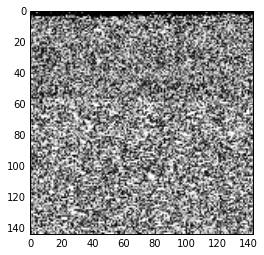

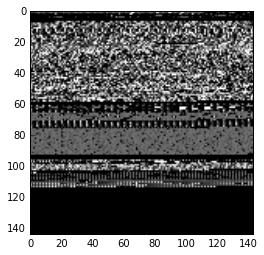

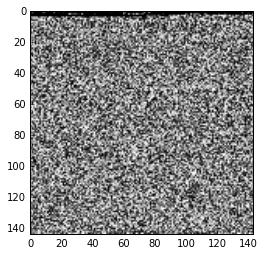

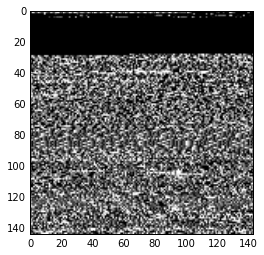

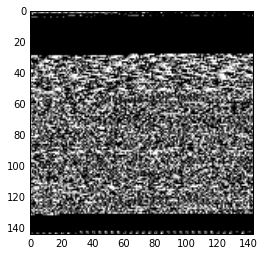

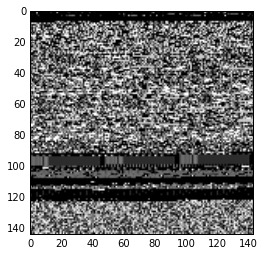

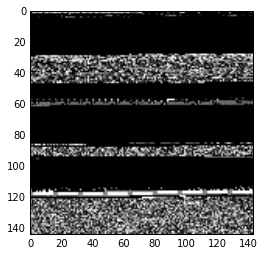

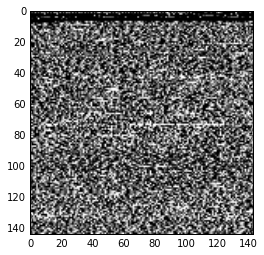

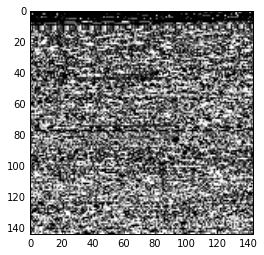

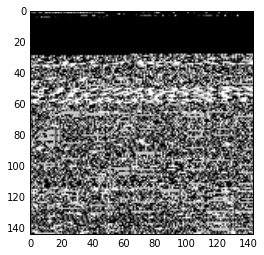

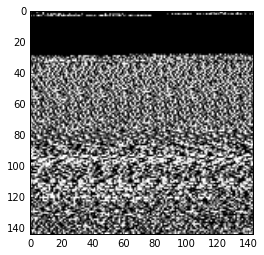

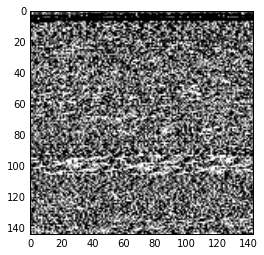

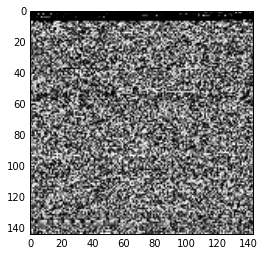

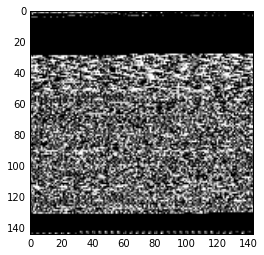

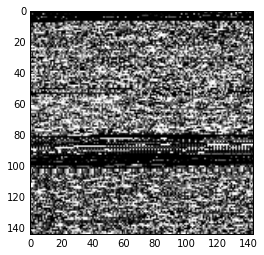

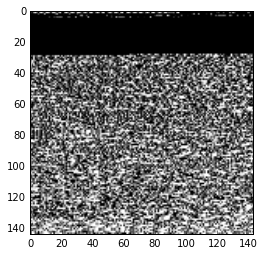

In [12]:
for i in range(20):
    plt.figure()
#     print y[i]
    plt.imshow(X[i].reshape(144,144), cmap="gray")

In [23]:
print y

[1 1 0 4 1 0 4 0 4 0 4 0 2 2 1 0 4 4 4 0 1 1 0 0 4 2 0 1 0 1 4 1 4 1 0 0 1
 0 0 4 0 0 0 2 0 4 4 0 2 0 0 0 4 1 4 1 0 1 0 0 2 1 0 4 1 4 0 4 2 4 4 4 0 1
 0 2 0 1 0 0 0 4 1 4 1 2 4 4 0 4 1 4 1 1 0 0 4 1 4 0 0 0 1 1 2 1 1 0 0 1 0
 0 0 1 2 2 1 2 0 4 4 0 0 0 2 4 1 1 4 1 4 0 0 1 1 0 4 0 4 1 0 1 1 4 0 1 4 0
 1 0 0 4 1 0 1 4 1 2 4 5 4 0 4 0 1 0 1 3 0 4 0 0 1 0 0 4 1 0 2 0 0 2 4 1 1
 0 0 0 0 0 4 0 2 4 1 1 4 0 0 1 0 4 4 4 4 4 1 1 0 0 4 0 0 0 0 1 2 1 4 2 0 0
 1 4 0 1 0 0 2 0 4 0 4 4 1 4 4 4 4 1 0 1 5 1 0 4 0 4 2 0 0 4 0 4 1 2 1 0 4
 0 1 4 0 4 1 4 1 2 2 4 2 1 2 0 0 1 2 4 4 0 1 1 4 2 0 4 1 0 4 0 4 1 2 1 1 0
 0 0 1 1 0 0 2 1 4 2 1 0 0 4 1 1 1 4 0 1 2 1 0 1 4 0 1 4 0 1 1 4 4 0 1 0 4
 0 1 1 0 0 0 1 1 4 4 1 1 0 4 4 1 0 4 4 0 1 1 4 4 1 4 4 1 2 2 1 4 0 1 4 0 0
 1 0 0 0 0 0 4 4 1 0 0 4 0 0 1 1 4 0 4 0 0 4 4 0 4 0 0 4 2 0 4 0 1 0 1 0 0
 1 0 4 1 1 4 1 1 4 4 4 0 1 4 4 4 4 0 2 4 4 0 2 1 0 4 1 0 4 0 0 1 1 4 4 1 0
 1 4 0 0 4 4 4 4 2 2 4 1 4 0 4 4 1 0 1 0 1 4 0 4 4 0 4 0 0 1 0 2 0 4 1 4 4
 0 0 4 1 1 4 4 0 2 1 4 2 

In [19]:
ratio = 0.7
X_train = X[:int(X.shape[0]*ratio)]
y_train = y[:int(y.shape[0]*ratio)]

X_test = X[int(X.shape[0]*ratio):]
y_test = y[int(X.shape[0]*ratio):]


In [20]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(527, 20736) (527,) (226, 20736) (226,)


In [21]:
X_mean = np.mean(X_train, axis=0)

X_train -= X_mean
X_test -= X_mean

In [22]:
ipca = IncrementalPCA(n_components=400, whiten=True)
ipca.fit(X_train)
X_train = ipca.transform(X_train)
X_test = ipca.transform(X_test)

In [23]:
print X_train.shape

(527, 400)


In [24]:
144*144

20736